In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
from readts import TSFile
import matplotlib.pyplot as plt

In [3]:
alau = TSFile('AlAu', 'alau-neb')

In [4]:
alau_tst = alau.blocks['TST']

alau_i = alau.blocks['REA'][1][0]
alau_f = alau.blocks['PRO'][1][0]
alau_tst[alau_tst.last_index]

[TSBlock(step=23, rcoord=0.0829646864, atoms=Atoms(symbols='Al12Au', pbc=True, cell=[5.608413, 5.608413, 13.75], calculator=SinglePointCalculator(...))),
 TSBlock(step=23, rcoord=0.215599009, atoms=Atoms(symbols='Al12Au', pbc=True, cell=[5.608413, 5.608413, 13.75], calculator=SinglePointCalculator(...))),
 TSBlock(step=23, rcoord=0.293163876, atoms=Atoms(symbols='Al12Au', pbc=True, cell=[5.608413, 5.608413, 13.75], calculator=SinglePointCalculator(...))),
 TSBlock(step=23, rcoord=0.370280097, atoms=Atoms(symbols='Al12Au', pbc=True, cell=[5.608413, 5.608413, 13.75], calculator=SinglePointCalculator(...))),
 TSBlock(step=23, rcoord=0.443791134, atoms=Atoms(symbols='Al12Au', pbc=True, cell=[5.608413, 5.608413, 13.75], calculator=SinglePointCalculator(...))),
 TSBlock(step=23, rcoord=0.51386804, atoms=Atoms(symbols='Al12Au', pbc=True, cell=[5.608413, 5.608413, 13.75], calculator=SinglePointCalculator(...))),
 TSBlock(step=23, rcoord=0.590027339, atoms=Atoms(symbols='Al12Au', pbc=True, cell

<IPython.core.display.Javascript object>


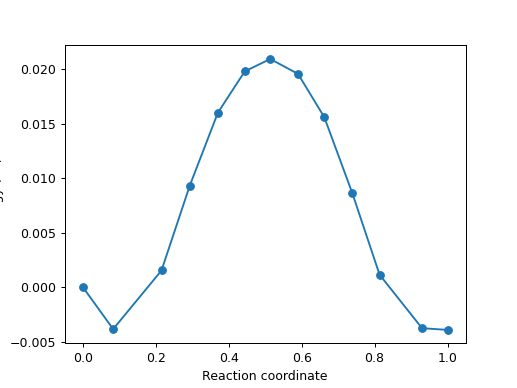

In [5]:
# Energy?
E_tst = alau_tst.get_energies(alau_tst.last_index)
E = np.zeros(len(E_tst)+2)
E[1:-1] = E_tst
E[0] = alau_i.atoms.get_potential_energy()
E[-1] = alau_f.atoms.get_potential_energy()

# Coordinates?
rcoords = np.zeros(len(E))
rcoords[1:-1] = alau_tst.get_rcoords(alau_tst.last_index)
rcoords[-1] = 1

fig, ax = plt.subplots()
ax.set_xlabel('Reaction coordinate')
ax.set_ylabel('Energy (eV)')

ax.plot(rcoords, E-E[0], 'o-')